In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print("Done!")

Done!


In [2]:
file =  'https://cocl.us/datascience_survey_data'
df = pd.read_csv(file)
df

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [3]:
%matplotlib inline
df.sort_values(by=['Very interested'], inplace=True, ascending=False)
df.rename(columns={'Unnamed: 0':'Topic'},inplace=True)
df_perc = df[['Topic']]
df_perc = df_perc.join((df[['Very interested','Somewhat interested','Not interested']]/2233)*100)
df_perc.set_index('Topic', inplace=True)
df_perc.round(2)

,Very interested,Somewhat interested,Not interested
Topic,,,
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


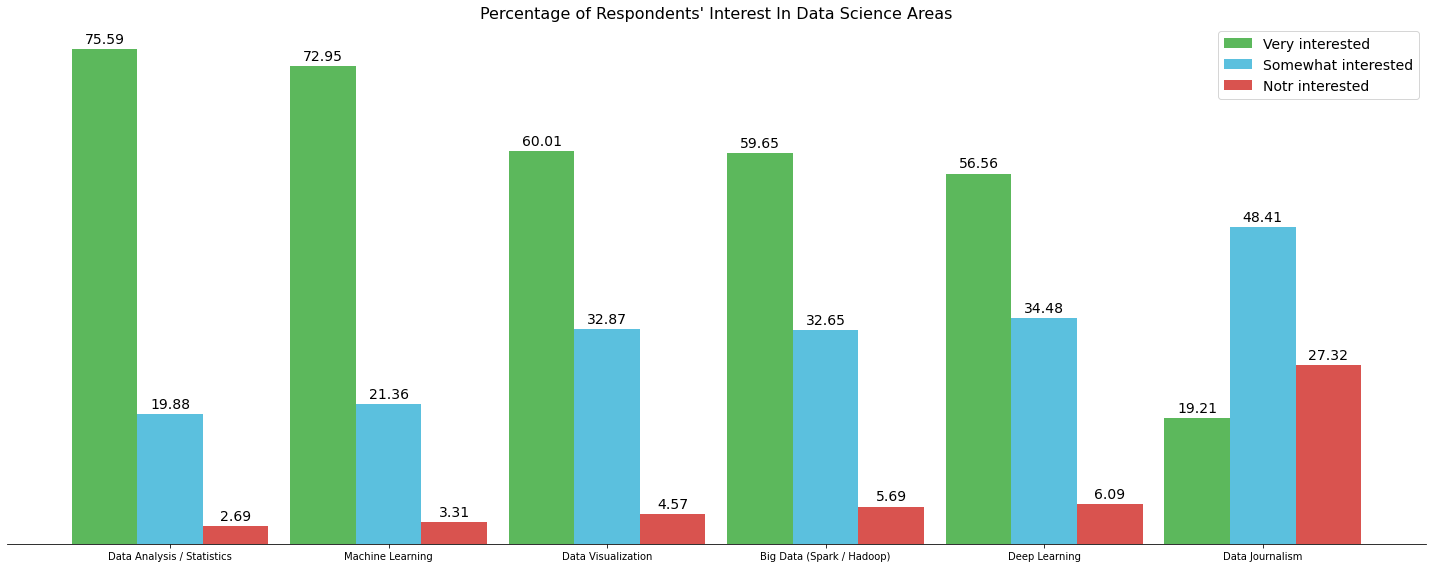

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels =['Data Analysis / Statistics','Machine Learning','Data Visualization','Big Data (Spark / Hadoop)','Deep Learning','Data Journalism']
very_int = df_perc['Very interested']
some_int = df_perc['Somewhat interested']
not_int = df_perc['Not interested']

ind = np.arange(len(very_int))  
width = 0.3

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(ind - width, very_int, width, label='Very interested', color='#5cb85c')
rects2 = ax.bar(ind, some_int, width, label='Somewhat interested', color='#5bc0de')
rects3 = ax.bar(ind + width, not_int, width, label='Notr interested', color='#d9534f')

ax.set_title("Percentage of Respondents' Interest In Data Science Areas", fontsize=16)
ax.set_xticks(ind)
ax.set_xticklabels((labels))
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=14)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height().round(2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', fontsize=14)


autolabel(rects1, "center")
autolabel(rects2, "center")
autolabel(rects3, "center")

fig.tight_layout()

plt.show()

In [5]:
file =  'https://cocl.us/sanfran_crime_dataset'
df_sf = pd.read_csv(file)
df_sf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [6]:
df_sf_neigh = df_sf.groupby(["PdDistrict"]).count().reset_index()
df_sf_neigh.drop(df_sf_neigh.columns.difference(['PdDistrict','IncidntNum']), 1, inplace=True)
df_sf_neigh.rename(columns={'PdDistrict':'Neighborhood','IncidntNum':'Count'}, inplace=True)
df_sf_neigh

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [7]:
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')
print('GeoJSON file downloaded!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



ModuleNotFoundError: No module named 'folium'

In [ ]:
sf_geo = 'https://cocl.us/sanfran_geojson'

sf_latitude = 37.77
sf_longitude = -122.42
sf_map = folium.Map(location=[sf_latitude,sf_longitude], zoom_start=12)

sf_map.choropleth(
    geo_data=sf_geo,
    data=df_sf_neigh,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate per District in San Francisco')

sf_map